In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
# Let's create synthetic data points 

from sklearn.datasets import make_classification


In [57]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

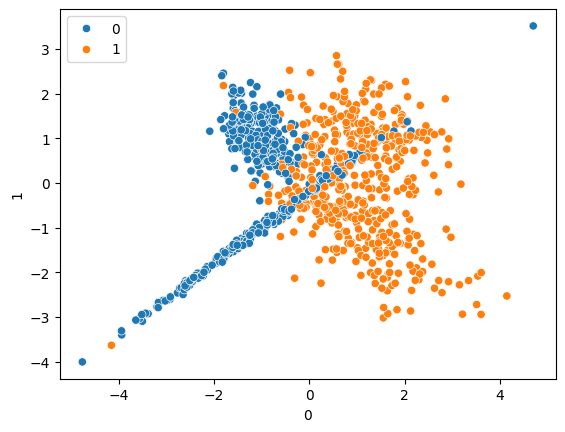

In [58]:
X_df = pd.DataFrame(X)

sns.scatterplot(x=X_df[0], y=X_df[1], hue=y)

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [60]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

In [61]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [62]:
y_pred = svc.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

score = accuracy_score(y_test,y_pred)
print(f'The accuracy score is : {score}')

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test,y_pred))

The accuracy score is : 0.888
[[115  13]
 [ 15 107]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       128
           1       0.89      0.88      0.88       122

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [64]:
rbf = SVC(kernel='rbf')


In [65]:
rbf.fit(X_train,y_train)

SVC()

In [69]:
y_pred1 = rbf.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

score = accuracy_score(y_test,y_pred1)
print(f'The accuracy score is : {score}')

cm = confusion_matrix(y_test,y_pred1)
print(cm)

print(classification_report(y_test,y_pred1))

The accuracy score is : 0.896
[[115  13]
 [ 13 109]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       128
           1       0.89      0.89      0.89       122

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [73]:
## Polynomial kernal

polynomial = SVC(kernel='poly')
polynomial.fit(X_train,y_train)
y_pred2 = polynomial.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

score = accuracy_score(y_test,y_pred2)
print(f'The accuracy score is : {score}')

cm = confusion_matrix(y_test,y_pred2)
print(cm)

print(classification_report(y_test,y_pred2))

The accuracy score is : 0.872
[[102  26]
 [  6 116]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       128
           1       0.82      0.95      0.88       122

    accuracy                           0.87       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.87      0.87       250



In [74]:
## Sigmoid Kernel

sig = SVC(kernel='sigmoid')
sig.fit(X_train,y_train)
y_pred3 = sig.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

score = accuracy_score(y_test,y_pred3)
print(f'The accuracy score is : {score}')

cm = confusion_matrix(y_test,y_pred3)
print(cm)

print(classification_report(y_test,y_pred3))

The accuracy score is : 0.84
[[104  24]
 [ 16 106]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       128
           1       0.82      0.87      0.84       122

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C' : [0.1,1,10,100,1000],
              'gamma' : [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf'] 
}

In [78]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [79]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [80]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = grid.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(f'The accuracy score is : {score}')

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test,y_pred))

The accuracy score is : 0.916
[[118  10]
 [ 11 111]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       128
           1       0.92      0.91      0.91       122

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

